<a href="https://colab.research.google.com/github/iey704/PeopleSpace_HW/blob/main/HW_Data_Analytics_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read csv file
file_path = '/content/yelp_business_data.csv'
df = pd.read_csv(file_path)

# Check the dataframe
print(df.head())

                             name  rating review  \
0       Moobongri Irvine Barranca     4.4     31   
1              Postino Park Place     4.7    673   
2   Bosscat Kitchen and Libations     4.3   5.3k   
3  Súp Noodle Bar by Kei Concepts     4.3   2.3k   
4        Nep Cafe by Kei Concepts     4.6    258   

                                                type  \
0                                         ['Korean']   
1    ['Wine Bars', 'Breakfast & Brunch', 'Caterers']   
2  ['New American', 'Breakfast & Brunch', 'Cockta...   
3         ['Vietnamese', 'Peruvian', 'Asian Fusion']   
4      ['Breakfast & Brunch', 'Cafes', 'Vietnamese']   

                                                 url  
0  /biz/moobongri-irvine-barranca-irvine?osq=Rest...  
1     /biz/postino-park-place-irvine?osq=Restaurants  
2  /biz/bosscat-kitchen-and-libations-irvine-3?os...  
3  /biz/s%C3%BAp-noodle-bar-by-kei-concepts-irvin...  
4  /biz/nep-cafe-by-kei-concepts-irvine-13?osq=Re...  


In [ ]:
# structure of the dataset
print(df.info())
print('\n')

print(df.shape)
print('\n')

# Summary statistics of numerical variables
print(df.describe())
print('\n')

# Check the missing values in the dataset
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1009 non-null   object 
 1   rating  1009 non-null   float64
 2   review  1009 non-null   object 
 3   type    1009 non-null   object 
 4   url     1009 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.5+ KB
None


(1009, 5)


            rating
count  1009.000000
mean      4.265015
std       0.371658
min       2.400000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000


name      0
rating    0
review    0
type      0
url       0
dtype: int64


In [ ]:
# Delete duplicate rows with the same values for all rows
df = df.drop_duplicates(keep='first')

# Output of data frames after deduplication
print("DataFrame after removing duplicates:")
print(df)

DataFrame after removing duplicates:
                                 name  rating review  \
0           Moobongri Irvine Barranca     4.4     31   
1                  Postino Park Place     4.7    673   
2       Bosscat Kitchen and Libations     4.3   5.3k   
3      Súp Noodle Bar by Kei Concepts     4.3   2.3k   
4            Nep Cafe by Kei Concepts     4.6    258   
...                               ...     ...    ...   
1004     Lobster - Guys Redondo Beach     4.7    230   
1005       Restoration Kitchen & Wine     4.4    519   
1006                          Bazille     4.2    302   
1007                  Cal Mex Cantina     4.1     88   
1008  The Rockefeller - Redondo Beach     4.0    431   

                                                   type  \
0                                            ['Korean']   
1       ['Wine Bars', 'Breakfast & Brunch', 'Caterers']   
2     ['New American', 'Breakfast & Brunch', 'Cockta...   
3            ['Vietnamese', 'Peruvian', 'Asian Fusion'

In [ ]:
import re

# Define 'review' column conversion function
def convert_review_value(value):
    try:
        num = re.search(r'\d+', value).group()
        if 'k' in value:
            return float(num) * 1000
        else:
            return float(num)
    except (TypeError, AttributeError):
        return value

# Transform by applying a function to the 'reviews' column
df['review'] = df['review'].apply(convert_review_value)

print(df)

                                 name  rating  review  \
0           Moobongri Irvine Barranca     4.4    31.0   
1                  Postino Park Place     4.7   673.0   
2       Bosscat Kitchen and Libations     4.3  5000.0   
3      Súp Noodle Bar by Kei Concepts     4.3  2000.0   
4            Nep Cafe by Kei Concepts     4.6   258.0   
...                               ...     ...     ...   
1004     Lobster - Guys Redondo Beach     4.7   230.0   
1005       Restoration Kitchen & Wine     4.4   519.0   
1006                          Bazille     4.2   302.0   
1007                  Cal Mex Cantina     4.1    88.0   
1008  The Rockefeller - Redondo Beach     4.0   431.0   

                                                   type  \
0                                            ['Korean']   
1       ['Wine Bars', 'Breakfast & Brunch', 'Caterers']   
2     ['New American', 'Breakfast & Brunch', 'Cockta...   
3            ['Vietnamese', 'Peruvian', 'Asian Fusion']   
4         ['Breakfas

<ipython-input-213-def92dad9890>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(convert_review_value)


In [ ]:
print(df.info())
print('\n')
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    840 non-null    object 
 1   rating  840 non-null    float64
 2   review  840 non-null    float64
 3   type    840 non-null    object 
 4   url     840 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.4+ KB
None


           rating        review
count  840.000000    840.000000
mean     4.267381    863.761905
std      0.378326   1329.788250
min      2.400000      1.000000
25%      4.000000    138.750000
50%      4.300000    458.500000
75%      4.500000   1000.000000
max      5.000000  18000.000000




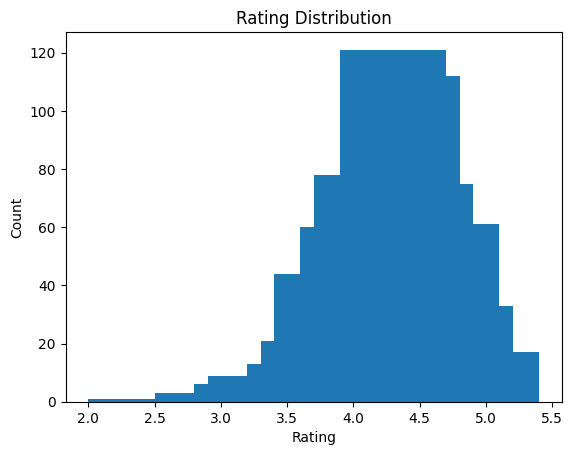

In [ ]:
# Group by rating and count
rating_counts = df['rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [ ]:
# Calculate default statistical measurements for Rating
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
std_dev_rating = df['rating'].std()

print(f'Mean Rating: {mean_rating:.2f}')
print(f'Median Rating: {median_rating:.2f}')
print(f'Standard Deviation Rating: {std_dev_rating:.2f}\n')

# Calculate default statistical measurements for Review
mean_review = df['review'].mean()
median_review = df['review'].median()
std_dev_review = df['review'].std()

print(f'Mean Review: {mean_review:.2f}')
print(f'Median Review: {median_review:.2f}')
print(f'Standard Deviation Review: {std_dev_review:.2f}')

Mean Rating: 4.27
Median Rating: 4.30
Standard Deviation Rating: 0.38

Mean Review: 863.76
Median Review: 458.50
Standard Deviation Review: 1329.79


Correlation Matrix:
          rating    review
rating  1.000000 -0.111259
review -0.111259  1.000000


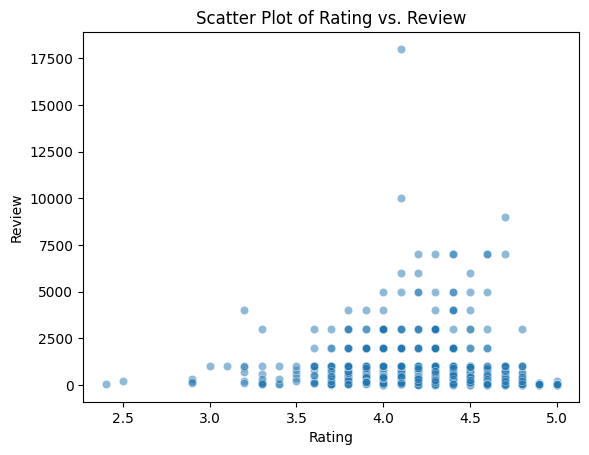

In [ ]:
import seaborn as sns

# Select numeric variables only
numeric_variables = ['rating', 'review']

# Determine the correlation between selected variables
correlation_matrix = df[numeric_variables].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize scatterplot matrices
sns.scatterplot(x='rating', y='review', data=df, alpha=0.5)
plt.title('Scatter Plot of Rating vs. Review')
plt.xlabel('Rating')
plt.ylabel('Review')

plt.show()

In [ ]:
# How are categorical variables distributed?
print(df['type'].value_counts())

['Korean']                                                20
['New American']                                          12
['Italian']                                               10
['Chinese']                                                7
['Filipino']                                               7
                                                          ..
['Latin American']                                         1
['Persian/Iranian', 'Middle Eastern', 'Mediterranean']     1
['Venezuelan', 'Empanadas']                                1
['Filipino', 'International Grocery']                      1
['Gastropubs', 'Breakfast & Brunch', 'Coffee & Tea']       1
Name: type, Length: 621, dtype: int64


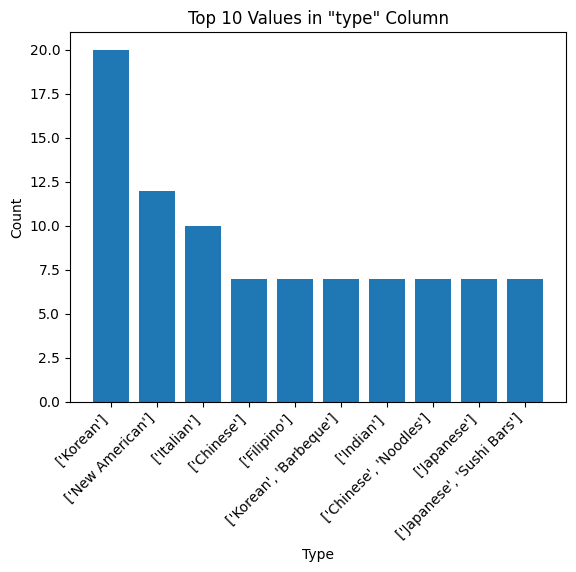

In [ ]:
top_10_values = df['type'].value_counts().head(10)

plt.bar(top_10_values.index, top_10_values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Values in "type" Column')
plt.show()

In [ ]:
# Group data by 'type' column
grouped_by_type = df.groupby('type')

# Output the top 10 groups based on the number of each group
top_10_groups = grouped_by_type.size().nlargest(10)

i=1

for group_name in top_10_groups.index:
    group_data = grouped_by_type.get_group(group_name)
    print(f'Type{i}: {group_name}')
    print(group_data)
    print('\n')
    i=i+1

Type1: ['Korean']
                                      name  rating  review        type  \
0                Moobongri Irvine Barranca     4.4    31.0  ['Korean']   
12                  Hanshin Pocha - Irvine     4.2    50.0  ['Korean']   
44                    Chan Chan Food House     4.2  1000.0  ['Korean']   
46                            Young Dabang     3.8    47.0  ['Korean']   
148                          Jopok Topokki     4.5   136.0  ['Korean']   
229                        Dosirak Express     4.6    79.0  ['Korean']   
321                                 HanBop     4.3   122.0  ['Korean']   
506                      Jinsol Gukbap 8th     4.7    37.0  ['Korean']   
520                                 Butnal     4.4    25.0  ['Korean']   
527                           CHD MANDU LA     4.6   287.0  ['Korean']   
574                       Jeonju Hyundaiok     4.5   109.0  ['Korean']   
612                         Seong Buk Dong     4.1  1000.0  ['Korean']   
613  Chuncheon Dakga

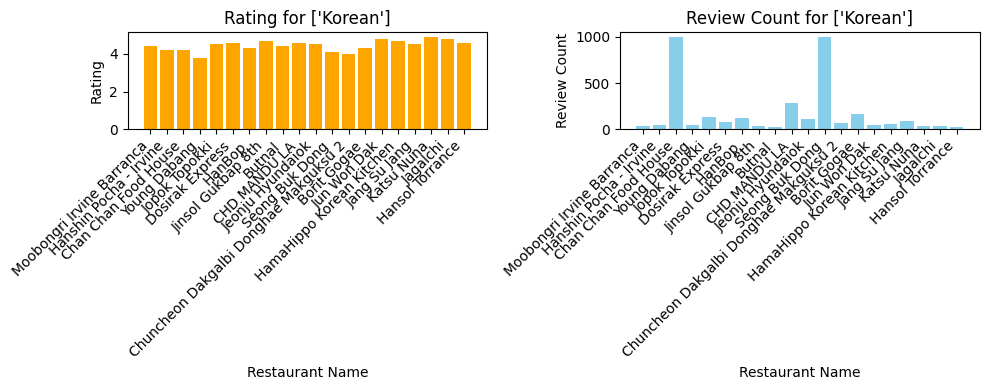

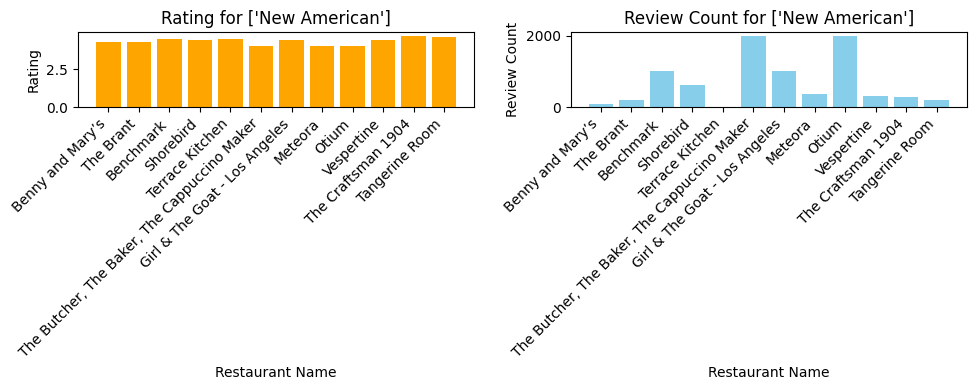

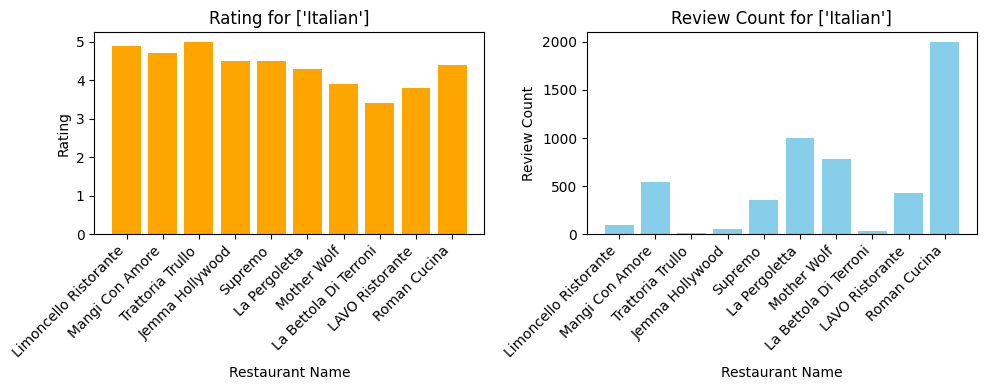

<ipython-input-220-7a430a6d5f16>:23: UserWarning: Glyph 28363 (\N{CJK UNIFIED IDEOGRAPH-6ECB}) missing from current font.
  plt.tight_layout()
<ipython-input-220-7a430a6d5f16>:23: UserWarning: Glyph 21619 (\N{CJK UNIFIED IDEOGRAPH-5473}) missing from current font.
  plt.tight_layout()
<ipython-input-220-7a430a6d5f16>:23: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  plt.tight_layout()
<ipython-input-220-7a430a6d5f16>:23: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28363 (\N{CJK UNIFIED IDEOGRAPH-6ECB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21619 (\N{CJK UNIFIED IDEOGRAPH-5473}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist

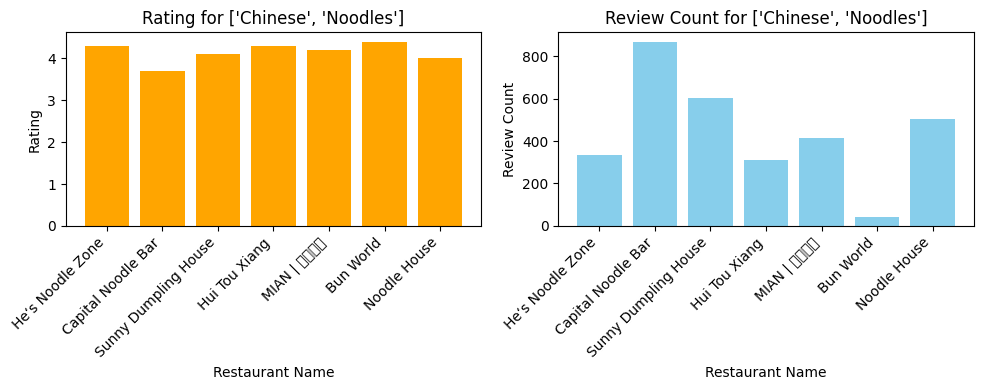

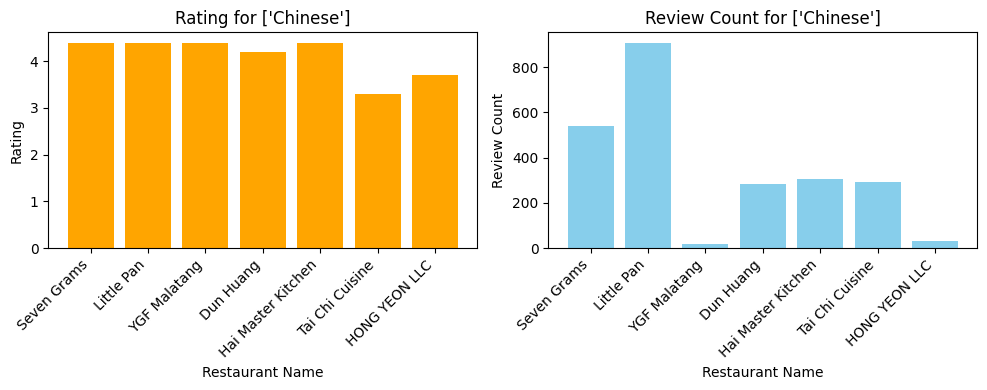

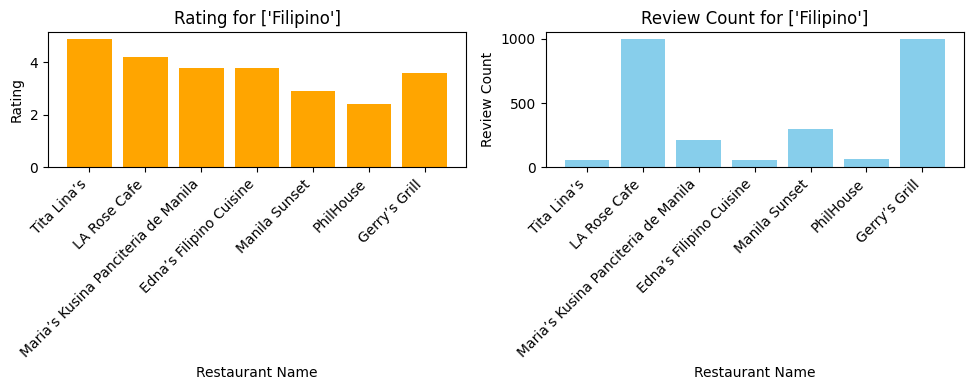

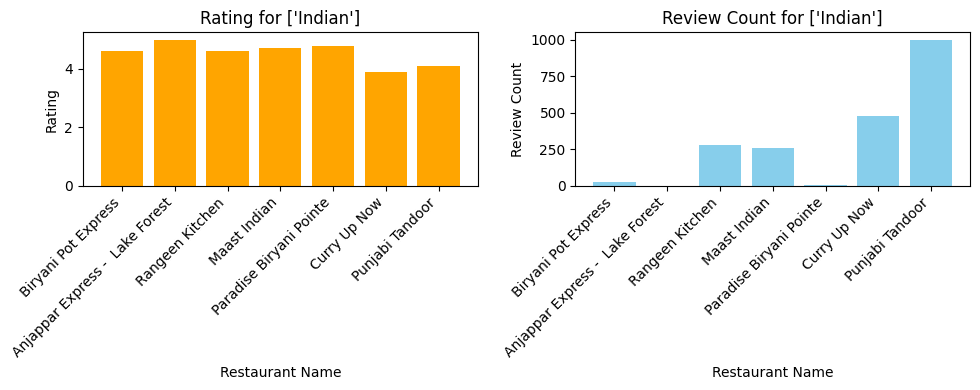

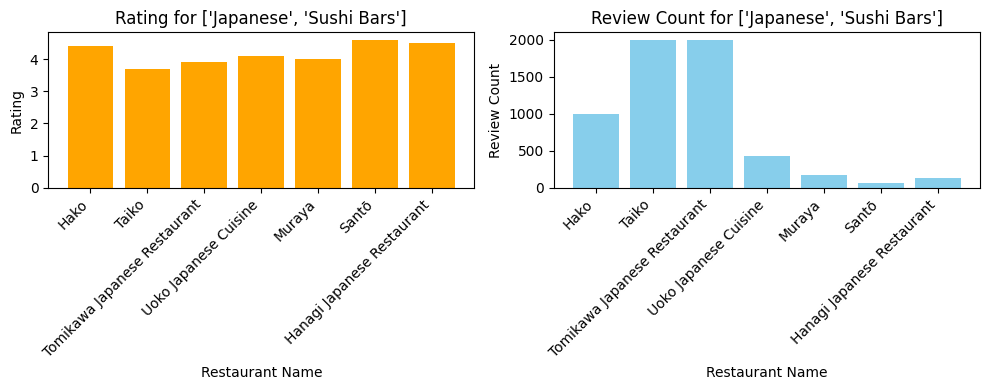

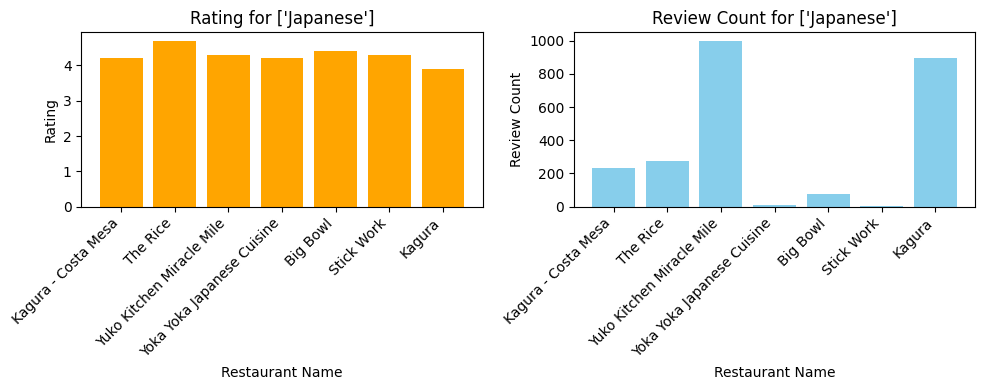

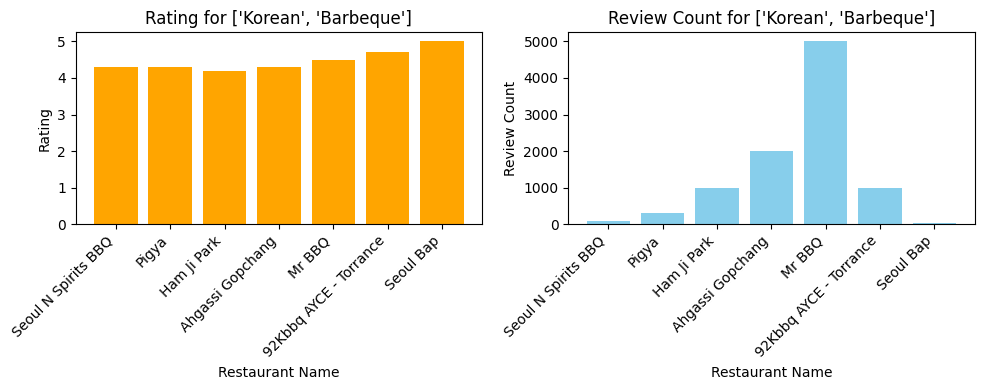

In [ ]:
import matplotlib.pyplot as plt

for group_name in top_10_groups.index:
    group_data = grouped_by_type.get_group(group_name)

    # Plotting for rating
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(group_data['name'], group_data['rating'], color='orange')
    plt.xlabel('Restaurant Name')
    plt.ylabel('Rating')
    plt.title(f'Rating for {group_name}')
    plt.xticks(rotation=45, ha='right')

    # Plotting for review
    plt.subplot(1, 2, 2)
    plt.bar(group_data['name'], group_data['review'], color='skyblue')
    plt.xlabel('Restaurant Name')
    plt.ylabel('Review Count')
    plt.title(f'Review Count for {group_name}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    i += 1

In [ ]:
# Calculate the average number of ratings
average_rating = df['rating'].mean()
print(f"Average of rating: {average_rating}")

# Calculate the average number of reviews
average_review = df['review'].mean()
print(f"Average of review count: {average_review}")

# Row output with rating and review higher than average
high_rating_and_review_rows = df[(df['rating'] > average_rating) & (df['review'] > average_review)]
print(high_rating_and_review_rows)

Average of rating: 4.267380952380952
Average of review count: 863.7619047619048
                               name  rating  review  \
2     Bosscat Kitchen and Libations     4.3  5000.0   
3    Súp Noodle Bar by Kei Concepts     4.3  2000.0   
6             Izakaya Osen - Irvine     4.3   918.0   
10                     Burnt Crumbs     4.3  1000.0   
15                          The Cut     4.3  1000.0   
..                              ...     ...     ...   
978             Dominique’s Kitchen     4.5   985.0   
992                            Jame     4.5   970.0   
993                King Mediterrano     4.7  1000.0   
996               Bettolino Kitchen     4.4   932.0   
997               The Standing Room     4.3  1000.0   

                                                  type  \
2    ['New American', 'Breakfast & Brunch', 'Cockta...   
3           ['Vietnamese', 'Peruvian', 'Asian Fusion']   
6                            ['Sushi Bars', 'Izakaya']   
10   ['New American', 'Sand

In [ ]:
# Sorting in order of highest rating
high_rating_and_review_rows_sorted = high_rating_and_review_rows.sort_values(by='rating', ascending=False)
print(high_rating_and_review_rows_sorted)

                               name  rating  review  \
973    Fatto a Mano, The Pasta Shop     4.8  1000.0   
672                          Holbox     4.8  1000.0   
505  BROKEN MOUTH | Lee’s Homestyle     4.8  1000.0   
306                    Greek Bistro     4.8  3000.0   
404                 Chaupain Bakery     4.7  1000.0   
..                              ...     ...     ...   
570                       HomeState     4.3  1000.0   
566                   La Pergoletta     4.3  1000.0   
3    Súp Noodle Bar by Kei Concepts     4.3  2000.0   
553                          Bestia     4.3  7000.0   
997               The Standing Room     4.3  1000.0   

                                                  type  \
973                ['Pasta Shops', 'Pizza', 'Italian']   
672           ['Latin American', 'Seafood', 'Mexican']   
505             ['Hawaiian', 'Korean', 'Comfort Food']   
306  ['Greek', 'Mediterranean', 'Beer, Wine & Spiri...   
404     ['Bakeries', 'Desserts', 'Breakfast & Bru

In [ ]:
from collections import Counter

# Extract the words contained in each list in the 'type' column
words_in_types = [word.strip("[]'") for types in high_rating_and_review_rows_sorted['type'] for word in types.replace("'", '').replace('[', '').replace(']', '').split(', ')]

# Calculate the frequency of words
word_counts = Counter(words_in_types)

# Top 10 words and frequency output
top_10_words = word_counts.most_common(10)
print ("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count} count")

Top 10 words:
New American: 26 count
Breakfast & Brunch: 23 count
Italian: 17 count
Seafood: 17 count
Korean: 17 count
American: 12 count
Sandwiches: 11 count
Mexican: 10 count
Cocktail Bars: 10 count
Asian Fusion: 10 count


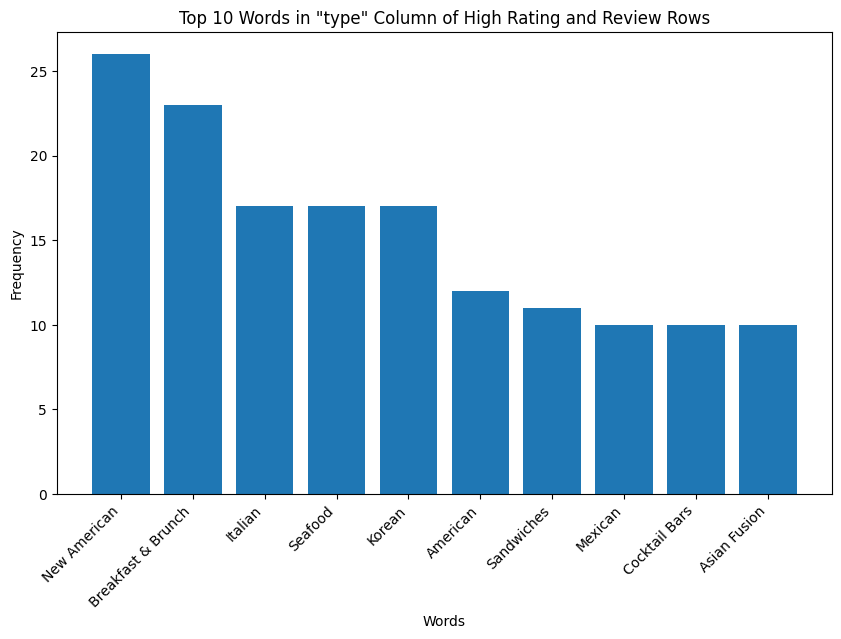

In [ ]:
# Top 10 words and frequency output
top_10_words = dict(word_counts.most_common(10))

# Visualize with bar graphs
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values())
plt.title('Top 10 Words in "type" Column of High Rating and Review Rows')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()